# Trabalho II - Modelo de Ising 2D
### Gabriel Victor Carvalho Rocha - 2018054907

In [1]:
import matplotlib.pyplot as plt
import math

In [2]:
def gera_vizinhanca(n):
    viz = [[0, 0, 0, 0] for _ in range(n)]
    
    l = int(n ** (1 / 2))

    for i in range(n):
        viz[i][0] = i + 1
        if ((i + 1) % l == 0): viz[i][0] = i + 1 - l
        viz[i][1] = i + l
        if ((i + 1) > n - l): viz[i][1] = i + l - n
        viz[i][2] = i - 1
        if (i % l == 0): viz[i][2] = i + l - 1
        viz[i][3] = i - l
        if (i < l): viz[i][3] = i + n - l
            
    return viz

In [3]:
def gray_flip(T, n):
    k = T[0]
    if (k > n): return
    T[k - 1] = T[k]
    T[k] = k + 1
    if (k != 1): T[0] = 1
    return k, T

In [4]:
def soma_vizinhanca(S, viz, k):
    soma = 0
    for v in viz[k]:
        soma += S[v]
    return soma

In [5]:
def enumera_ising(n):
    G = {i: 0 for i in range(-2 * n, 2 * n + 1)}
    G_maior_zero = {}
    S = [-1 for _ in range(n)]
    T = [i for i in range(1, n + 2)]
    
    if (n == 36):
        values  = [13172279424, 11674988208, 8196905106, 4616013408]
        values += [2122173684, 808871328, 260434986, 71789328, 17569080]
        values += [3846576, 804078, 159840, 35148, 6048, 1620, 144, 72, 0, 2]
        for i in range(0, 2 * n + 1, 4):
            G[i] = values[int(i / 4)]        
        for i in range(- 2 * n, 0, 4):
            G[i] = values[int(i / -4)]
        for e in G:
            if G[e] > 0:
                G_maior_zero[e] = G[e]
        return G_maior_zero
        
        
    viz = gera_vizinhanca(n)
    
    E = - 2 * n
    G[E] = 2
    
    for i in range((2 ** (n - 1)) - 1):
        k, T = gray_flip(T, n)
        h = soma_vizinhanca(S, viz, k)
        E = E + 2 * S[k] * h
        G[E] = G[E] + 2
        S[k] = -S[k]
        
    for e in G:
        if G[e] > 0:
            G_maior_zero[e] = G[e]
            
    return G_maior_zero

In [6]:
def get_e_min(G):
    e_min = math.inf
    for e in G:
        if e < e_min:
            e_min = e
    return e_min

In [7]:
def media_termodinamica(G, temperatura, n):
    z = e_t = e_t2 = 0
    b = 1 / temperatura
    e_min = get_e_min(G)
    for e in G:
        e_ = e - e_min
        z += G[e] * (math.e ** (-b * e_))
        e_t += e_ * G[e] * (math.e ** (-b * e_))
        e_t2 += (e_ ** 2) * G[e] * (math.e ** (-b * e_))
    e_t /= z
    e_t2 /= z
    z *= math.e ** (-b * e_min)
    cv = ((b ** 2) * (e_t2 - (e_t ** 2))) / n
    e = (e_t + e_min) / n
    return z, e, cv

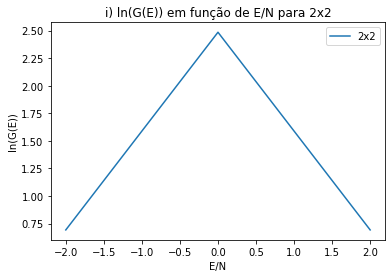

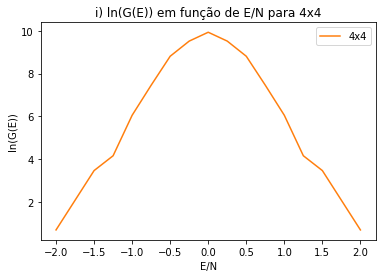

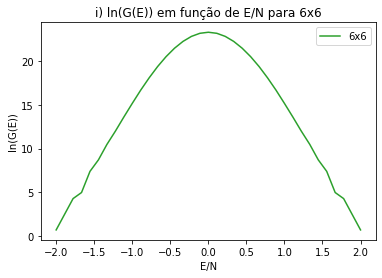

In [8]:
#2x2, 4x4 e 6x6
#i) ln (g(E)) como função de E/N.

def grafico_en_lnge(l, color):
    n = l ** 2
    G = enumera_ising(n)
    x = [e / n for e in G]
    y = [math.log(G[e]) for e in G]
    plt.plot(x, y, label=f"{l}x{l}", color=color)
    plt.xlabel("E/N")
    plt.ylabel("ln(G(E))")
    plt.legend()
    plt.title(f"i) ln(G(E)) em função de E/N para {l}x{l}")
    plt.show()
    
colors = {2: "C0", 4: "C1", 6: "C2"}

for l in [2, 4, 6]:
    grafico_en_lnge(l, colors[l])

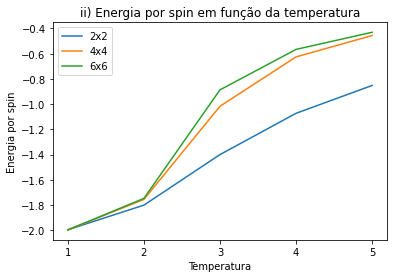

In [9]:
#2x2, 4x4 e 6x6
#ii) Energia por spin, e, como função da temperatura

def grafico_temperatura_energiaporspin(l):
    n = l ** 2
    e= []
    G = enumera_ising(n)
    temperaturas = [1, 2, 3, 4, 5]

    for t in temperaturas:
        zt, et, cvt = media_termodinamica(G, t, n)
        e.append(et)

    plt.xticks(temperaturas)
    plt.plot(temperaturas, e, label=f"{l}x{l}")
    
for l in [2, 4, 6]:
    grafico_temperatura_energiaporspin(l)

plt.xlabel("Temperatura")
plt.ylabel("Energia por spin")
plt.legend()
plt.title("ii) Energia por spin em função da temperatura")
plt.show()

Através do gráfico ii, é possível observar que quanto maior a temperatura, maior será o valor da energia por spin, possuindo uma relação totalmente crescente.

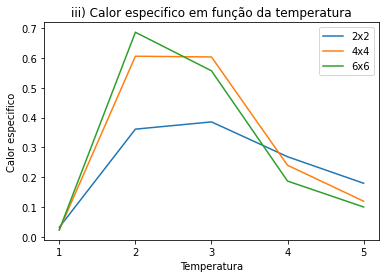

In [10]:
#2x2, 4x4 e 6x6
#iii) Calor específico, cv, como função da temperatura

def grafico_temperatura_caloresp(l):
    n = l ** 2
    cv = []
    G = enumera_ising(n)
    temperaturas = [1, 2, 3, 4, 5]

    for t in temperaturas:
        zt, et, cvt = media_termodinamica(G, t, n)
        cv.append(cvt)

    plt.xticks(temperaturas)
    plt.plot(temperaturas, cv, label=f"{l}x{l}")
    
for l in [2, 4, 6]:
    grafico_temperatura_caloresp(l)


plt.xlabel("Temperatura")
plt.ylabel("Calor especifico")
plt.legend()
plt.title("iii) Calor especifico em função da temperatura")
plt.show()

Já em relação ao gráfico iii, é visível a partir da curva 6x6 a tendência gerada à medida que n cresce. Há um aumento significativo do calor específico entre as temperaturas 2 e 3 e uma queda acentuada logo em seguida.

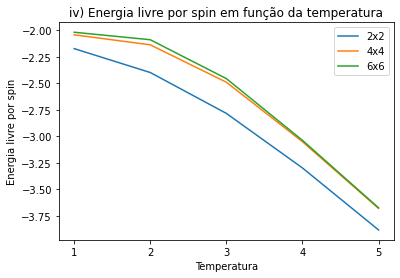

In [11]:
#2x2, 4x4 e 6x6
#iv) Energia livre por spin
def grafico_temperatura_energialivreporspin(l):
    n = l ** 2
    f_t = []
    G = enumera_ising(n)
    temperaturas = [1, 2, 3, 4, 5]

    for t in temperaturas:
        zt, et, cvt = media_termodinamica(G, t, n)
        f_t.append(-(1 / (n * (1 / t))) * math.log(zt))

    plt.xticks(temperaturas)
    plt.plot(temperaturas, f_t, label=f"{l}x{l}")
    
for l in [2, 4, 6]:
    grafico_temperatura_energialivreporspin(l)


plt.xlabel("Temperatura")
plt.ylabel("Energia livre por spin")
plt.legend()
plt.title("iv) Energia livre por spin em função da temperatura")
plt.show()

Ao contrário do gráfico ii, o gráfico iv apresenta uma tendência de queda da energia livre por spin à medida que a temperatura aumenta.

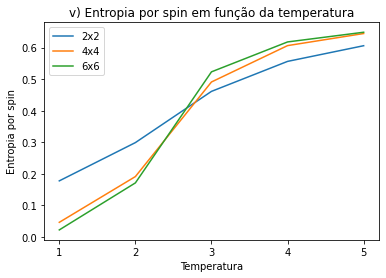

In [12]:
#2x2, 4x4 e 6x6
#v) Entropia por spin
def grafico_temperatura_entropiaporspin(l):
    n = l ** 2
    s_t = []
    G = enumera_ising(n)
    temperaturas = [1, 2, 3, 4, 5]

    for t in temperaturas:
        zt, et, cvt = media_termodinamica(G, t, n)
        f_t = -(1 / (n * (1 / t))) * math.log(zt)
        s_t.append((et - f_t) / t)

    plt.xticks(temperaturas)
    plt.plot(temperaturas, s_t, label=f"{l}x{l}")
    
for l in [2, 4, 6]:
    grafico_temperatura_entropiaporspin(l)


plt.xlabel("Temperatura")
plt.ylabel("Entropia por spin")
plt.legend()
plt.title("v) Entropia por spin em função da temperatura")
plt.show()

E mais uma vez, o gráfico v é marcado com uma tendência de crescimento em relação a temperatura. Aqui, a entropia por spin aumenta à medida que a temperatura aumenta, com um comportamento similar ao gráfico ii.